Import all required Libraries ...
The dataset that I have trained my model is CICIDS-2017 Dataset stand for The Canadian Institute for Cybersecurity Intrusion Detection System 2017 (CICIDS-2017) dataset is developed at ISCX Consortium. The dataset consists of eight traffic monitoring sessions,different types of features, It include about 80 feawturs I.e (flow duration, total packet in the forward direction, minimum size of packets etc).
It include various types of attacks include: DOS ATTACK, WEB ATTACK, INFILTERATION ATTACKS AND BOTTNET ATTACK

In [ ]:
import os
import time
import sys
from pathlib import Path

In [ ]:
!pip install tqdm

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from subprocess import call
import torch

import os

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
import tensorflow as tf
from sklearn.preprocessing import StandardScaler, minmax_scale
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from keras import optimizers
from keras.optimizers import Adam

from keras.regularizers import l1, L2, l1_l2
from keras.layers import Input, Dense

import warnings
warnings.filterwarnings('ignore')

from tensorflow.keras.metrics import Mean
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

from sklearn.metrics import accuracy_score, recall_score, classification_report, confusion_matrix

from sklearn.compose import make_column_transformer

from tqdm import tqdm
from time import sleep

from tensorflow.keras import Model, Sequential

%matplotlib inline


This is the link of the dataset , the dataset is in my google drwive , so i am linking data from my google drive

In [ ]:
#now we can used the given  modules ..
parent="/content/sample_data"
directory= "Network_traffic_folder"
path= os.path.join(parent,directory)

if not os.path.exists:
  os.mkdir(path)
  print("The directory have been created")
else:
  print("The directory is already created")

The directory is already created


In [ ]:
!pip install wget

  Preparing metadata (setup.py) ... done
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9656 sha256=0a8a8873487a510b07bb30f37b1847c8124895102ac7ad854163bd7b8e80af18
  Stored in directory: /root/.cache/pip/wheels/40/b3/0f/a40dbd1c6861731779f62cc4babcb234387e11d697df70ee97
Successfully built wget


#Preporcessing

This methods include normalization and i have performed standard normalization (-1 to 1)
Other technique include SelectKbest which is a machine learning technique for selecting best
features in the dataset that influence the data most

In [ ]:
import os
import zipfile
import shutil
import wget
import glob


from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.impute import SimpleImputer

from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import make_column_transformer
from sklearn.pipeline import Pipeline





from shutil import copyfile

In [ ]:
import glob
import os
import shutil
source_path=["/content/drive/MyDrive/02-14-2018.csv","/content/drive/MyDrive/02-15-2018.csv","/content/drive/MyDrive/02-16-2018.csv"]

def Copying_files(source_path,destination_path):
  for i in range(len(source_path)):
    for files in glob.iglob(os.path.join(source_path[i], "*.csv")):
      if files.endswith(".csv"):
        shutil.copy(files, path)

Copying_files(source_path,path)

In [ ]:
data=pd.read_csv(source_path[0])

In [ ]:
data.head(5)

,Dst Port,Protocol,Timestamp,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,0,0,14/02/2018 08:31:01,112641719,3,0,0,0,0,0,...,0,0.0,0.0,0,0,56320859.5,139.300036,56320958,56320761,Benign
1,0,0,14/02/2018 08:33:50,112641466,3,0,0,0,0,0,...,0,0.0,0.0,0,0,56320733.0,114.551299,56320814,56320652,Benign
2,0,0,14/02/2018 08:36:39,112638623,3,0,0,0,0,0,...,0,0.0,0.0,0,0,56319311.5,301.934596,56319525,56319098,Benign
3,22,6,14/02/2018 08:40:13,6453966,15,10,1239,2273,744,0,...,32,0.0,0.0,0,0,0.0,0.000000,0,0,Benign
4,22,6,14/02/2018 08:40:23,8804066,14,11,1143,2209,744,0,...,32,0.0,0.0,0,0,0.0,0.000000,0,0,Benign


In [ ]:
data.columns

Index(['Dst Port', 'Protocol', 'Timestamp', 'Flow Duration', 'Tot Fwd Pkts',
       'Tot Bwd Pkts', 'TotLen Fwd Pkts', 'TotLen Bwd Pkts', 'Fwd Pkt Len Max',
       'Fwd Pkt Len Min', 'Fwd Pkt Len Mean', 'Fwd Pkt Len Std',
       'Bwd Pkt Len Max', 'Bwd Pkt Len Min', 'Bwd Pkt Len Mean',
       'Bwd Pkt Len Std', 'Flow Byts/s', 'Flow Pkts/s', 'Flow IAT Mean',
       'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min', 'Fwd IAT Tot',
       'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max', 'Fwd IAT Min',
       'Bwd IAT Tot', 'Bwd IAT Mean', 'Bwd IAT Std', 'Bwd IAT Max',
       'Bwd IAT Min', 'Fwd PSH Flags', 'Bwd PSH Flags', 'Fwd URG Flags',
       'Bwd URG Flags', 'Fwd Header Len', 'Bwd Header Len', 'Fwd Pkts/s',
       'Bwd Pkts/s', 'Pkt Len Min', 'Pkt Len Max', 'Pkt Len Mean',
       'Pkt Len Std', 'Pkt Len Var', 'FIN Flag Cnt', 'SYN Flag Cnt',
       'RST Flag Cnt', 'PSH Flag Cnt', 'ACK Flag Cnt', 'URG Flag Cnt',
       'CWE Flag Count', 'ECE Flag Cnt', 'Down/Up Ratio', 'Pkt Size Avg',
      

In [ ]:
#to find the values .........
print("Shape of the dataset:",data.shape)
print("Number of samples in the dataset:",data.shape[0])
print("Number of features in the dataset:",data.shape[1])
print("data type of features:\n\n", data.dtypes)
#check the number of columns that are null values ..
print("Columns having null values values:", data.columns[data.isnull().any()].tolist())

Shape of the dataset: (1048575, 80)
Number of samples in the dataset: 1048575
Number of features in the dataset: 80
data type of features:

 Dst Port           int64
Protocol           int64
Timestamp         object
Flow Duration      int64
Tot Fwd Pkts       int64
                  ...   
Idle Mean        float64
Idle Std         float64
Idle Max           int64
Idle Min           int64
Label             object
Length: 80, dtype: object
Columns having null values values: ['Flow Byts/s']


In [ ]:
import numpy as np
import pandas as pd
from sklearn.impute import SimpleImputer

object_columns = data.select_dtypes(include=['object']).columns
bool_columns = data.select_dtypes(include=['bool']).columns
print("Features with 'object' data type:", object_columns)
print("Features with 'bool' data type:", bool_columns)


features = data.columns

Features with 'object' data type: Index(['Timestamp', 'Label'], dtype='object')
Features with 'bool' data type: Index([], dtype='object')


#Perform Imputation in place of +inf, -inf or nan

There are features that include null values or the valeus that is near to infinitie is not supported by the float data type .so I have performed the means imputation , which means that it can calcualte the mean value of
feature and select mean value in place of null values

In [ ]:

data.replace([np.inf, -np.inf], np.nan, inplace=True)

nan_columns = data[features].isna().any()

print("\nColumns containing NaN values:")
print(nan_columns[nan_columns == True])


columns_to_impute = nan_columns[nan_columns == True].index


imputer = SimpleImputer(strategy='mean')


for col in columns_to_impute:
    data[[col]] = imputer.fit_transform(data[[col]])




Columns containing NaN values:
Flow Byts/s    True
Flow Pkts/s    True
dtype: bool


#Feature Normalization

standarization Technique

In [ ]:
max_threshold = 3
min_threshold = -3

# Select numeric columns
numeric_features = data.select_dtypes(include=[np.number]).columns

# Select features for normalization based on threshold conditions
features_to_normalize = numeric_features[
    (data[numeric_features].max() > max_threshold) |
    (data[numeric_features].min() < min_threshold)
].tolist()

print("Features selected for normalization:", features_to_normalize)


numeric_columns = data.select_dtypes(include=[np.number]).columns
original_dtypes = data[numeric_columns].dtypes


column_transformer = make_column_transformer(
    (StandardScaler(), features_to_normalize),
    remainder='passthrough'  # Leave non-numeric columns unchanged
)




# Apply the transformation
df_normalized = pd.DataFrame(
    column_transformer.fit_transform(data),
    columns=data.columns
)

print(df_normalized.dtypes)

Features selected for normalization: ['Dst Port', 'Protocol', 'Flow Duration', 'Tot Fwd Pkts', 'Tot Bwd Pkts', 'TotLen Fwd Pkts', 'TotLen Bwd Pkts', 'Fwd Pkt Len Max', 'Fwd Pkt Len Min', 'Fwd Pkt Len Mean', 'Fwd Pkt Len Std', 'Bwd Pkt Len Max', 'Bwd Pkt Len Min', 'Bwd Pkt Len Mean', 'Bwd Pkt Len Std', 'Flow Byts/s', 'Flow Pkts/s', 'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min', 'Fwd IAT Tot', 'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max', 'Fwd IAT Min', 'Bwd IAT Tot', 'Bwd IAT Mean', 'Bwd IAT Std', 'Bwd IAT Max', 'Bwd IAT Min', 'Fwd Header Len', 'Bwd Header Len', 'Fwd Pkts/s', 'Bwd Pkts/s', 'Pkt Len Min', 'Pkt Len Max', 'Pkt Len Mean', 'Pkt Len Std', 'Pkt Len Var', 'Down/Up Ratio', 'Pkt Size Avg', 'Fwd Seg Size Avg', 'Bwd Seg Size Avg', 'Subflow Fwd Pkts', 'Subflow Fwd Byts', 'Subflow Bwd Pkts', 'Subflow Bwd Byts', 'Init Fwd Win Byts', 'Init Bwd Win Byts', 'Fwd Act Data Pkts', 'Fwd Seg Size Min', 'Active Mean', 'Active Std', 'Active Max', 'Active Min', 'Idle Mean', 'Idl

Preserve Data types After Imputations

In [ ]:
# Save original dtypes of numeric columns
original_dtypes = data[numeric_features].dtypes

# Check and convert only numeric columns back to their original types
for col in df_normalized.columns:
    if col in numeric_features:
        try:
            if original_dtypes[col] == np.int64:
                # Convert back to int only if the original type was int
                df_normalized[col] = df_normalized[col].astype(np.int64)
            else:
                df_normalized[col] = df_normalized[col].astype(original_dtypes[col])
        except ValueError:
            print(f"Skipping column '{col}' due to incompatible data type conversion.")

print(df_normalized.dtypes)


Skipping column 'Bwd Byts/b Avg' due to incompatible data type conversion.
Dst Port           int64
Protocol           int64
Timestamp         object
Flow Duration      int64
Tot Fwd Pkts       int64
                  ...   
Idle Mean        float64
Idle Std         float64
Idle Max           int64
Idle Min           int64
Label             object
Length: 80, dtype: object


In [ ]:
nan_inf_columns = df_normalized[features].isna().any() | (df_normalized[features] == np.inf).any() | (df_normalized[features] == -np.inf).any()

# Print the columns that contain NaN, +inf, or -inf values
print("Columns containing NaN, +inf, or -inf values:")
print(nan_inf_columns[nan_inf_columns].index.tolist())

Columns containing NaN, +inf, or -inf values:
[]


In [ ]:
from sklearn.feature_selection import SelectKBest, f_classif
import numpy as np
df_normalized.shape[1]

80

#Preprocessing

Coafficent coarelationship matrix, the visualization of matrix can help in understanding the reawltionship between different featuers and there importnance

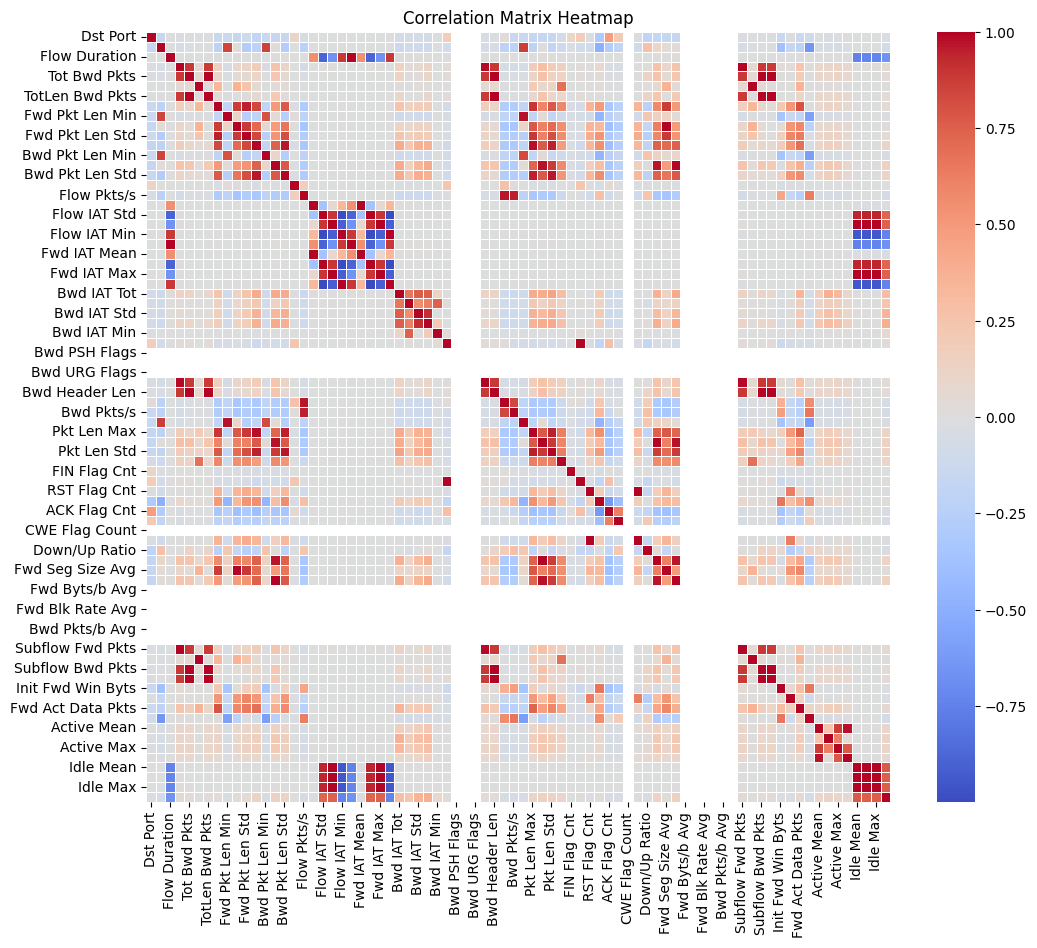

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def Coafficent_Coarelationship_Matrix(data):
    # Exclude non-numeric columns
    numeric_data = data.select_dtypes(include=['number'])

    # Calculate the correlation matrix
    corr_matrix = numeric_data.corr()

    # Plot the heatmap with annotations
    plt.figure(figsize=(12, 10))
    sns.heatmap(corr_matrix, annot=False, fmt=".2f", cmap='coolwarm', linewidths=0.5)
    plt.title('Correlation Matrix Heatmap')
    plt.show()

# Assuming 'df' is your dataframe
Coafficent_Coarelationship_Matrix(data)


#Preprocessing class of dataset

This class has various function to give information about dataset like finding the number of samples , splitting of data, visualization of caofficent matrix, selectiuon of important features ,differnt types of attacks and perform imputation

In [ ]:
class Dataset_Preprocessing(torch.utils.data.Dataset):
    def __init__(self,data) -> None:
        super(Dataset_Preprocessing, self).__init__()
        self.data = data


    def __len__(self):
        return len(self.data)  # Return the length of the list of images

    def __getitem__(self, index): #used it during testing model
        return self.data[index]


    def Data_Splitting(self,Normalized_data):

        X = Normalized_data.drop(columns=['Label'])
        y = Normalized_data['Label']

        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

        X_train = X_train.reset_index(drop=True)
        X_test = X_test.reset_index(drop=True)
        y_train = y_train.reset_index(drop=True)
        y_test = y_test.reset_index(drop=True)

        y_train_bool = y_train == 'Benign'
        y_test_bool = y_test == 'Benign'

        X_train_benign = X_train[y_train_bool]


        X_train_malicious = X_test[~y_train_bool]


        print(f"Number of benign samples in the training set: {len(X_train_benign)}")
        print(f"Number of malicious samples in the training set: {len(X_train_malicious)}")


        return  X,y,X_train,X_test,y_train,y_test,X_train_benign,X_train_malicious


    def Attack_Summary(self):
      unique_labels = self.data['Label'].unique()
      print("Unique labels in the dataset:", unique_labels)

      label_counts = self.data['Label'].value_counts()
      print("\nNumber of samples for each label:")
      print(label_counts)

      label_percentages = (label_counts / len(self.data)) * 100
      print("\nPercentage of each label:")
      print(label_percentages)

      benign_count = label_counts['Benign']
      malicious_count = len(self.data) - benign_count
      benign_percentage = (benign_count / len(self.data)) * 100
      malicious_percentage = 100 - benign_percentage

      print("\nSummary:")
      print(f"Benign samples: {benign_count} ({benign_percentage:.2f}%)")
      print(f"Malicious samples: {malicious_count} ({malicious_percentage:.2f}%)")




    def Feature_Selection(self,corr_matrix,numeric_data,threshold=0.8):
      high_corr_var = set()
      for i in range(len(corr_matrix.columns)):
        for j in range(i):
          if abs(corr_matrix.iloc[i, j]) > threshold:
            colname = corr_matrix.columns[i]
            high_corr_var.add(colname)


      print(f"Features with correlation higher than {threshold}:")
      print(high_corr_var)

      self.data= numeric_data.drop(columns=high_corr_var)

      return high_corr_var,self.data



    def Imputation_And_Top_Ten_Features(self,X,y):

      X = df_normalized.drop(columns=['Label'])
      y = df_normalized['Label']
      X_numeric = X.select_dtypes(include=[np.number])
      selector = SelectKBest(score_func=f_classif, k=10)
      X_new = selector.fit_transform(X_numeric, y)
      selected_features = X_numeric.columns[selector.get_support()]
      print("Top 10 numerical features selected:", selected_features)

      return selector, selected_features, X_new







#AutoEncoder Model Training

Auto Encoder on of the unsupervised learning technique for reconstruction of input data. It is used for various problems like anomlay detection or other purpose .
The basic purpose of this technique is to reduce the snumber of features , perform the reduction on dataset , feed data as an input , compressed the dataset into latent space and then reconstruction the input data by using the decoder .
I have used the autoencoder model by using 5 differnt layers, hvaing differnt number of nodes at each layer and the number of neurons in eawch layer include nodes [60,50,40,30,15].
By traiing the model on normal dataset and trained it on normal samples , then test it on both anomaly and normal samples , the reconstruction error will ehlp in detecting the anomaly samples in the dataset

In [ ]:
class Training_Network_Model():
    def __init__(self,data) -> None:
        super(Training_Network_Model, self).__init__()
        self.data = data


    def __len__(self):
        return len(self.data)  # Return the length of the list of images

    def Encoder_Decoder_Model(self,X_train):

        input_size= X_train.shape[1]
        Input_Layer_size= [60,50,40,30,15]

        Input_Layer = Input(shape=(input_size,))
        Enc_Layer_1 = Dense(Input_Layer_size[0], activation='relu')(Input_Layer)
        Enc_Layer_2 = Dense(Input_Layer_size[1], activation='relu')(Enc_Layer_1)
        Enc_Layer_3= Dense(Input_Layer_size[2],  activation="relu")(Enc_Layer_2)
        Enc_Layer_4= Dense (Input_Layer_size[3], activation="relu")(Enc_Layer_3)


        Latent_Layer = Dense(Input_Layer_size[4], activation='relu')(Enc_Layer_4)

        Dec_Layer_1 = Dense(Input_Layer_size[3], activation='relu')(Latent_Layer)
        Dec_Layer_2 = Dense(Input_Layer_size[2], activation='relu')(Dec_Layer_1)
        Dec_Layer_3 = Dense(Input_Layer_size[1], activation='relu')(Dec_Layer_2)
        Dec_Layer_4 = Dense(Input_Layer_size[0], activation='relu')(Dec_Layer_3)


        Output_Layer = Dense(input_size, activation='linear')(Dec_Layer_4)

        Auto_Encoder = Model(Input_Layer, Output_Layer, name='anomaly_detection_model')


        model_name = "anomaly_detection_model.weights.h5"
        checkpoint = ModelCheckpoint(model_name,
                                    monitor="val_loss",
                                    mode="min",
                                    save_best_only=True,
                                    save_weights_only=True,
                                    verbose=1)



        earlystopping = EarlyStopping(monitor='val_loss',
                                min_delta = 0,
                                patience = 5,
                                verbose = 1,
                                restore_best_weights=True)


        callbacks = [checkpoint, earlystopping]

        Auto_Encoder.compile(optimizer=Adam(), loss="mean_squared_error")

        return Auto_Encoder, callbacks,earlystopping,checkpoint


    def Training_Model(self,Auto_Encoder,X_train_benign,X_test,callbacks):
      history = Auto_Encoder.fit(X_train_benign, X_train_benign,
                          epochs=8, batch_size=64,
                          validation_data=(X_test, X_test),
                          callbacks=callbacks, shuffle=True)



      Reconstructions = Auto_Encoder.predict(X_test, verbose=0)

      reconstruction_error = np.mean(np.square(X_test - Reconstructions), axis=1)

      return history, reconstruction_error




#Visualization Class

This class include differnt fwunction that visualize the performance , matrix ,feature importnace and different graph that will help in understanding the data

In [ ]:
class Network_Data_Visualization():
    def __init__(self,data) -> None:
        super(Network_Data_Visualization, self).__init__()
        self.data=data


    def Data_Visualization(self,y):

      attack_distribution = y.value_counts(normalize=True) * 100
      plt.figure(figsize=(8, 8))
      plt.pie(attack_distribution, labels=attack_distribution.index, autopct='%1.1f%%', startangle=140)
      plt.title('Attack Types Distribution Based on Selected Features')
      plt.show()



    def Coefficient_Correlation_Matrix(self):

      numeric_data = self.data.select_dtypes(include=['number'])
      corr_matrix = numeric_data.corr()
      plt.figure(figsize=(12, 10))
      sns.heatmap(corr_matrix, annot=False, fmt=".2f", cmap='coolwarm', linewidths=0.5)
      plt.title('Correlation Matrix Heatmap')
      plt.show()
      return corr_matrix,numeric_data


    def Feature_Importance(self, selected_features):
      top_features = selected_features

      top_features_with_label = pd.concat([self.data[top_features], self.data['Label']], axis=1)

      malicious_samples = top_features_with_label[top_features_with_label['Label'] != 'Benign']

      plt.figure(figsize=(14, 10))

      for i, feature in enumerate(top_features):
          plt.subplot(3, 4, i + 1)
          sns.boxplot(x='Label', y=feature, data=top_features_with_label, palette="Set2")
          plt.title(f'{feature} Distribution', fontsize=12)
          plt.xticks(rotation=45)

      plt.tight_layout()
      plt.show()


Object of classess

In [ ]:
Preprocess_Model = Dataset_Preprocessing(df_normalized)

In [ ]:
Training_Model = Training_Network_Model(df_normalized)

In [ ]:
Visualize_Model = Network_Data_Visualization(df_normalized)

#Attack Summary of Whole Dataset

In [ ]:
Preprocess_Model.Attack_Summary()

Unique labels in the dataset: ['Benign' 'FTP-BruteForce' 'SSH-Bruteforce']

Number of samples for each label:
Label
Benign            667626
FTP-BruteForce    193360
SSH-Bruteforce    187589
Name: count, dtype: int64

Percentage of each label:
Label
Benign            63.669838
FTP-BruteForce    18.440264
SSH-Bruteforce    17.889898
Name: count, dtype: float64

Summary:
Benign samples: 667626 (63.67%)
Malicious samples: 380949 (36.33%)


#Splitting of Dataset

In [ ]:
X,y,X_train,X_test,y_train,y_test,X_train_benign,X_train_malicious= Preprocess_Model.Data_Splitting(df_normalized)
#splitting of data

Number of benign samples in the training set: 534229
Number of malicious samples in the training set: 75890


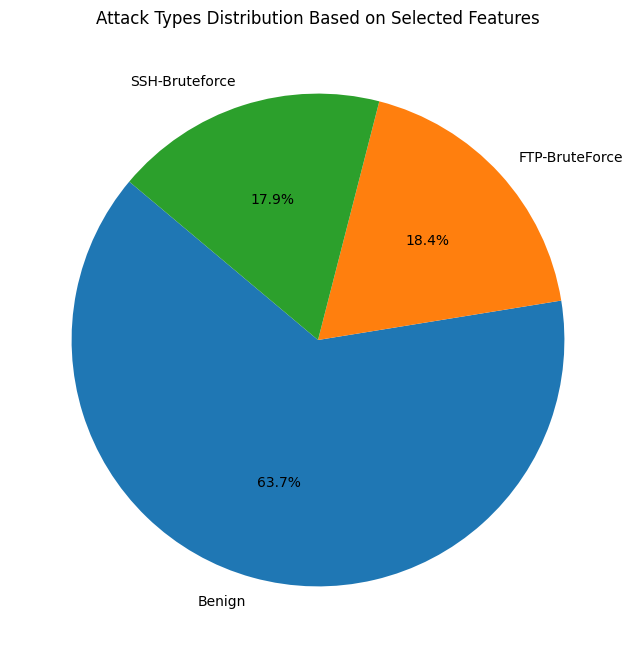

In [ ]:
Visualize_Model.Data_Visualization(y)
#visualization of set of data

#Imporantant features visualiztion

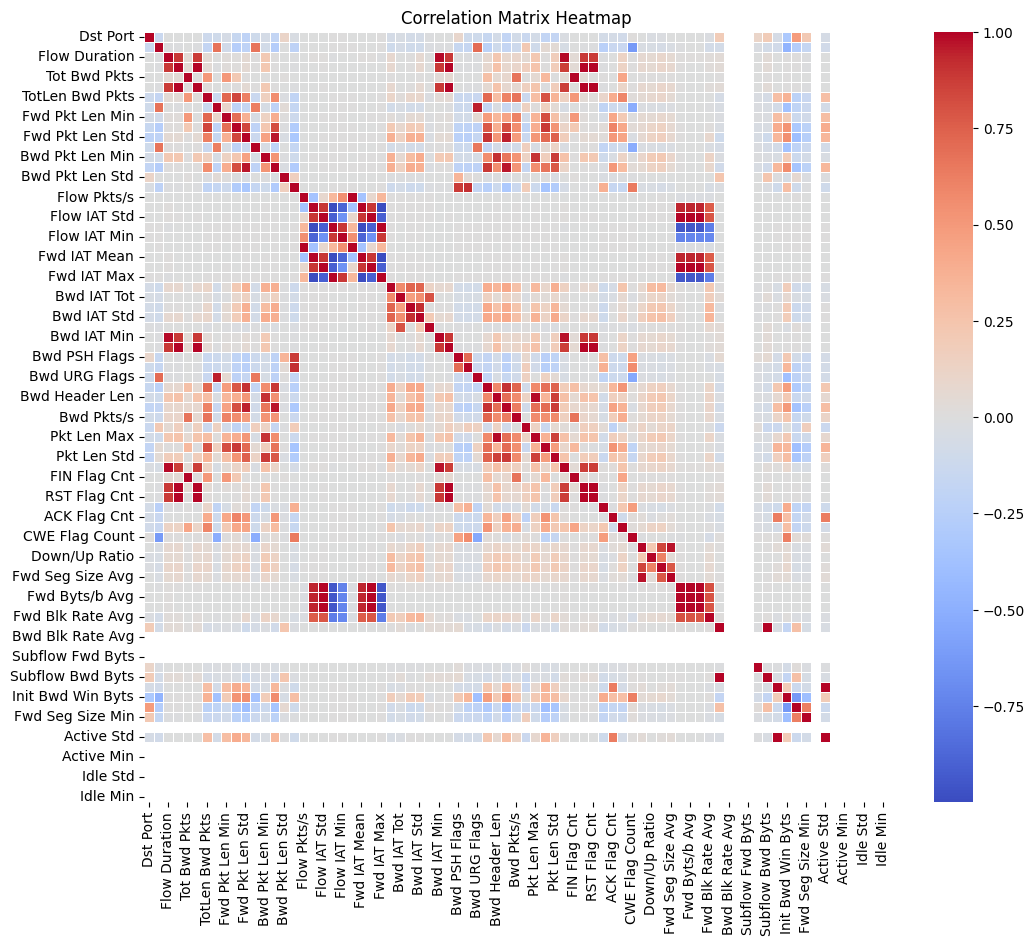

In [ ]:
corr_matrix,numeric_data=Visualize_Model.Coefficient_Correlation_Matrix()

In [ ]:
high_corr_features,reduced_data=Preprocess_Model.Feature_Selection(corr_matrix,numeric_data,threshold=0.8)

Features with correlation higher than 0.8:
{'Active Std', 'Fwd Seg Size Avg', 'Fwd Header Len', 'Fwd IAT Std', 'Bwd IAT Std', 'Bwd URG Flags', 'Subflow Bwd Byts', 'RST Flag Cnt', 'Flow IAT Std', 'TotLen Fwd Pkts', 'Flow IAT Max', 'Bwd IAT Min', 'Bwd Header Len', 'Fwd PSH Flags', 'Fwd URG Flags', 'Fwd Byts/b Avg', 'Pkt Len Mean', 'Pkt Len Var', 'Fwd Blk Rate Avg', 'Fwd IAT Tot', 'Fwd Pkt Len Mean', 'Pkt Len Max', 'Fwd Pkt Len Std', 'Pkt Size Avg', 'Fwd IAT Mean', 'Fwd Pkts/s', 'Bwd PSH Flags', 'Bwd Pkt Len Mean', 'Fwd Pkts/b Avg', 'Fwd IAT Max', 'Pkt Len Std', 'Flow IAT Min', 'Bwd Seg Size Avg', 'Tot Fwd Pkts', 'SYN Flag Cnt', 'FIN Flag Cnt'}


In [ ]:
reduced_data['Label']=data['Label']

In [ ]:
X,y,X_train,X_test,y_train,y_test,X_train_benign,X_train_malicious= Preprocess_Model.Data_Splitting(reduced_data)
#splitting of data

Number of benign samples in the training set: 534229
Number of malicious samples in the training set: 75890


In [ ]:
print(f"Number of benign samples in the training set: {len(X_train_benign)}")
print(f"Number of malicious samples in the training set: {len(X_train_malicious)}")

Number of benign samples in the training set: 534229
Number of malicious samples in the training set: 75890


#Remove the Redudant features from the dataset

In [ ]:
selector, selected_features, X_new= Preprocess_Model.Imputation_And_Top_Ten_Features(X,y)

Top 10 numerical features selected: Index(['Flow Byts/s', 'Bwd PSH Flags', 'Fwd URG Flags', 'Pkt Len Mean',
       'PSH Flag Cnt', 'URG Flag Cnt', 'CWE Flag Count', 'Init Bwd Win Byts',
       'Fwd Act Data Pkts', 'Fwd Seg Size Min'],
      dtype='object')


#Visualizaztion of top ten most influencing features

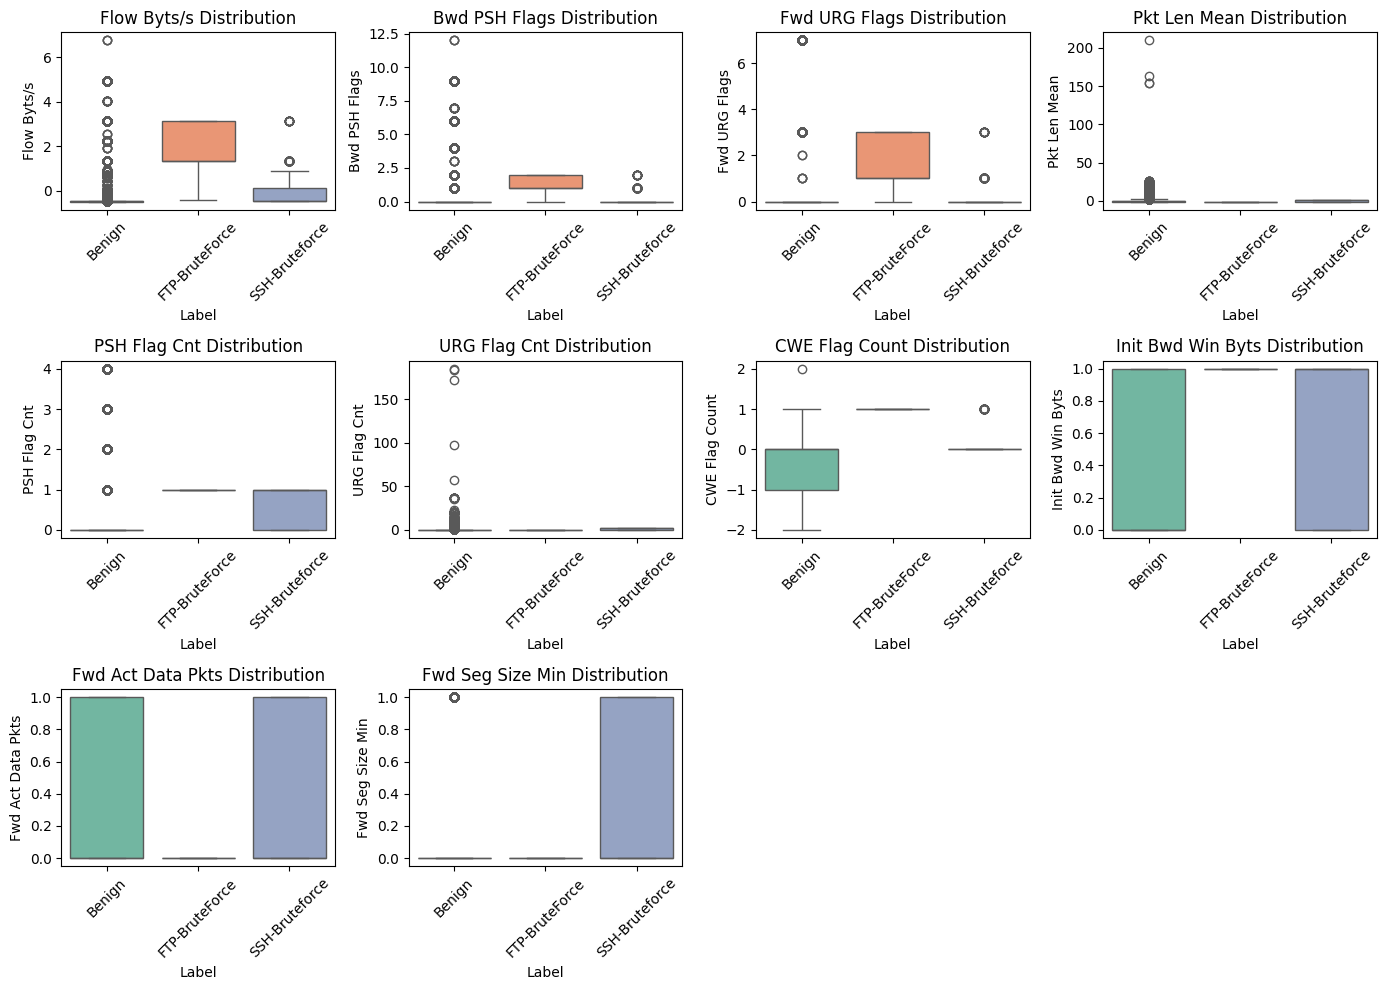

In [ ]:
Visualize_Model.Feature_Importance(selected_features)

In [ ]:
# Identify columns that are supposed to be numeric but might contain non-numeric values
for col in X_train_benign.columns:
    try:
        X_train_benign[col].astype(float)
    except ValueError:
        print(f"Column '{col}' contains non-numeric values.")

In [ ]:
X_train_benign.shape[1]

41

#Training an Autoencoder

In [ ]:
Auto_Encoder, callbacks,earlystopping,checkpoint=Training_Model.Encoder_Decoder_Model(X_train_benign)

In [ ]:
history,Reconstruction_error= Training_Model.Training_Model(Auto_Encoder,X_train_benign,X_test,callbacks)

Epoch 1/8
8336/8348 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2937
Epoch 1: val_loss improved from inf to 0.14663, saving model to anomaly_detection_model.weights.h5
8348/8348 ━━━━━━━━━━━━━━━━━━━━ 36s 4ms/step - loss: 0.2937 - val_loss: 0.1466
Epoch 2/8
8331/8348 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2008
Epoch 2: val_loss improved from 0.14663 to 0.11753, saving model to anomaly_detection_model.weights.h5
8348/8348 ━━━━━━━━━━━━━━━━━━━━ 36s 4ms/step - loss: 0.2008 - val_loss: 0.1175
Epoch 3/8
8334/8348 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0962
Epoch 3: val_loss did not improve from 0.11753
8348/8348 ━━━━━━━━━━━━━━━━━━━━ 31s 4ms/step - loss: 0.0963 - val_loss: 0.1807
Epoch 4/8
8337/8348 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1784
Epoch 4: val_loss did not improve from 0.11753
8348/8348 ━━━━━━━━━━━━━━━━━━━━ 38s 3ms/step - loss: 0.1787 - val_loss: 0.1378
Epoch 5/8
8342/8348 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2363
Epoch 5: val_loss did not improve from 0.11753
8348/

In [ ]:
Reconstruction_error_df = pd.DataFrame({
    'error': Reconstruction_error,
    'actual': y_test
}).reset_index(drop=True)
Reconstruction_error_df.head()

,error,actual
0,0.000599,Benign
1,0.000961,Benign
2,0.000464,Benign
3,0.002712,Benign
4,0.000640,Benign


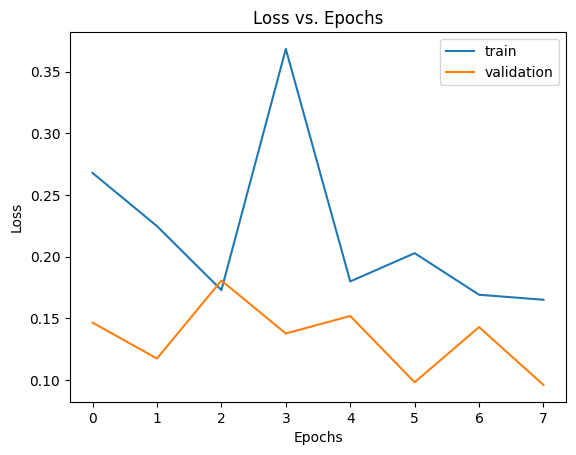

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['train', 'validation'])
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss vs. Epochs')
plt.show()


In [ ]:
unique_labels = Reconstruction_error_df['actual'].unique()
print("Unique labels:", unique_labels)
Reconstruction_error_df['actual'] = Reconstruction_error_df['actual'].apply(lambda x: 0 if x == 'Benign' else 1)
Reconstruction_error_df.head()

Unique labels: ['Benign' 'SSH-Bruteforce' 'FTP-BruteForce']


,error,actual
0,0.000599,0
1,0.000961,0
2,0.000464,0
3,0.002712,0
4,0.000640,0


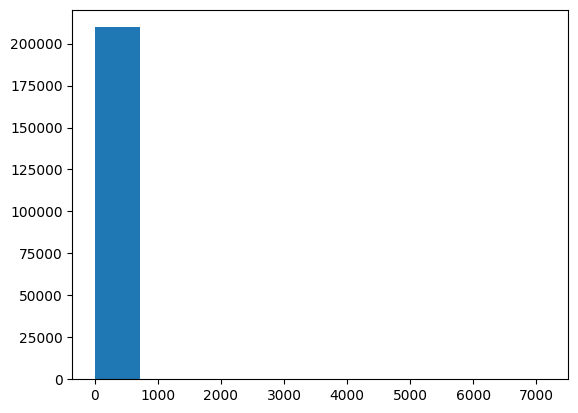

In [ ]:
import matplotlib.pyplot as plt
plt.hist(Reconstruction_error_df['error'], bins=10)
plt.show()

In [ ]:
print(Reconstruction_error_df['error'].describe())
print(Reconstruction_error_df['error'].unique())

count    209715.000000
mean          0.096153
std          15.621833
min           0.000151
25%           0.000986
50%           0.006275
75%           0.106719
max        7153.398924
Name: error, dtype: float64
[0.00059874 0.00096101 0.00046371 ... 0.00048779 0.00161246 0.0304789 ]


In [ ]:

thresh_df = {
  'threshold': [],
  'accuracy': [],
  'precision': [],
  'recall': [] }

for i in range(10):
    thresh_value = Reconstruction_error_df['error'].quantile(i / 10)

    preds = Reconstruction_error_df['error'] > thresh_value
    actual = Reconstruction_error_df['actual']


    tp = ((preds == True) & (actual == True)).sum()
    fp = ((preds == True) & (actual == False)).sum()
    tn = ((preds == False) & (actual == False)).sum()
    fn = ((preds == False) & (actual == True)).sum()

    # Calculating accuracy, precision, recall
    accuracy = (tp + tn) / (tp + fp + tn + fn)
    precision = tp / (tp + fp) if tp + fp > 0 else 0
    recall = tp / (tp + fn) if tp + fn > 0 else 0

    thresh_df['threshold'].append(thresh_value)
    thresh_df['accuracy'].append(accuracy)
    thresh_df['precision'].append(precision)
    thresh_df['recall'].append(recall)

    print(f"Threshold: {thresh_value:.4f}\tAccuracy: {accuracy:.3f}\t\tPrecision: {precision:.3f}\tRecall Score: {recall:.3f}")



Threshold: 0.0002	Accuracy: 0.364		Precision: 0.364	Recall Score: 1.000
Threshold: 0.0005	Accuracy: 0.464		Precision: 0.404	Recall Score: 1.000
Threshold: 0.0008	Accuracy: 0.564		Precision: 0.455	Recall Score: 1.000
Threshold: 0.0012	Accuracy: 0.664		Precision: 0.520	Recall Score: 1.000
Threshold: 0.0018	Accuracy: 0.764		Precision: 0.607	Recall Score: 1.000
Threshold: 0.0063	Accuracy: 0.864		Precision: 0.728	Recall Score: 1.000
Threshold: 0.0205	Accuracy: 0.844		Precision: 0.787	Recall Score: 0.783
Threshold: 0.0559	Accuracy: 0.875		Precision: 0.898	Recall Score: 0.741
Threshold: 0.1421	Accuracy: 0.735		Precision: 0.905	Recall Score: 0.305
Threshold: 0.1542	Accuracy: 0.715		Precision: 0.892	Recall Score: 0.245


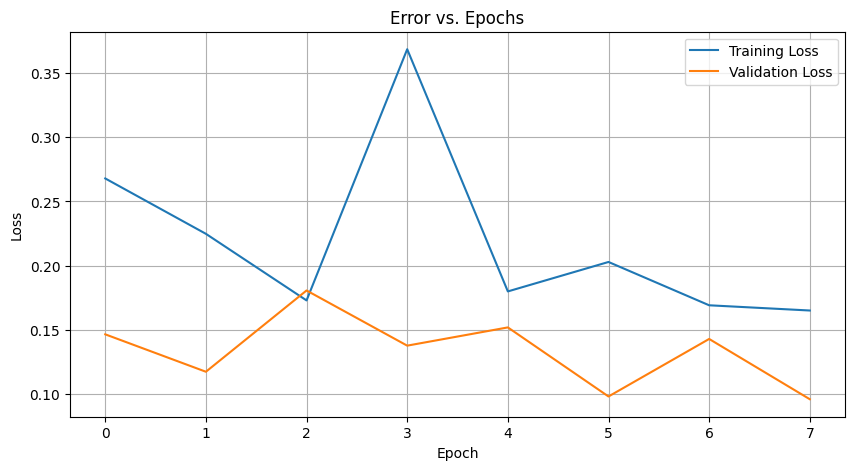

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Error vs. Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
Best_threshold=0.0063

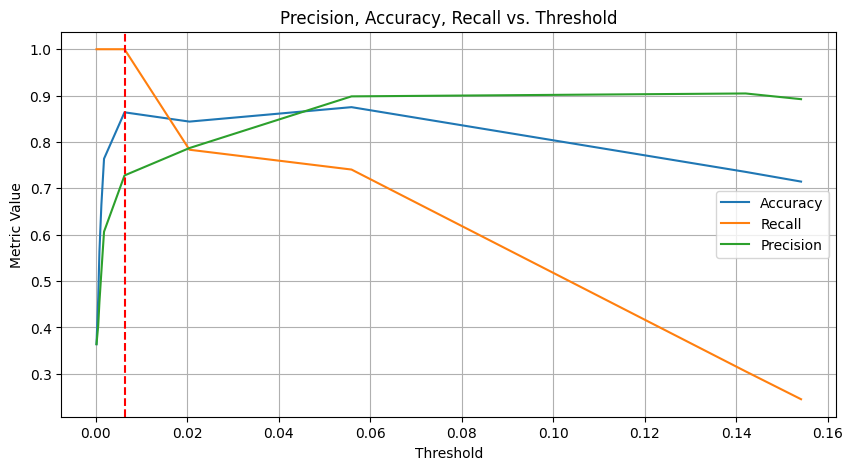

In [ ]:
import  matplotlib.pyplot as plt

thresholds = thresh_df['threshold']
accuracies = thresh_df['accuracy']
recalls = thresh_df['recall']
precisions = thresh_df['precision']

plt.figure(figsize=(10, 5))
plt.plot(thresholds, accuracies, label='Accuracy')
plt.plot(thresholds, recalls, label='Recall')
plt.plot(thresholds, precisions, label='Precision')
plt.axvline(x=Best_threshold, color='r', linestyle='dashed')
plt.title('Precision, Accuracy, Recall vs. Threshold')
plt.xlabel('Threshold')
plt.ylabel('Metric Value')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
Best_threshold=0.0063
Reconstruction_error_df['y_pred'] = Reconstruction_error_df['error'] > Best_threshold
Reconstruction_error_df['actual']=Reconstruction_error_df['actual'].astype(bool)
Reconstruction_error_df.head()

,error,actual,y_pred
0,0.000599,False,False
1,0.000961,False,False
2,0.000464,False,False
3,0.002712,False,False
4,0.000640,False,False


In [ ]:
print(classification_report(Reconstruction_error_df['actual'],Reconstruction_error_df['y_pred']))

              precision    recall  f1-score   support

       False       1.00      0.79      0.88    133397
        True       0.73      1.00      0.84     76318

    accuracy                           0.86    209715
   macro avg       0.86      0.89      0.86    209715
weighted avg       0.90      0.86      0.87    209715



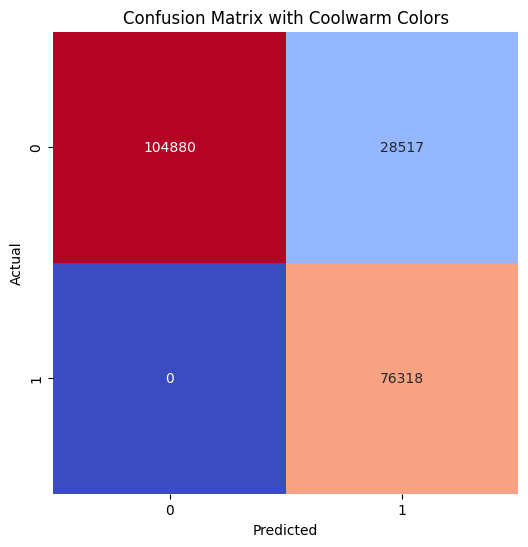

In [ ]:
cm = confusion_matrix(Reconstruction_error_df ['actual'], Reconstruction_error_df['y_pred'])

plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, cmap='coolwarm', cbar=False, fmt='.6g')  # Change 'coolwarm' to any valid colormap
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix with Coolwarm Colors')
plt.show()